In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('data/gemstone.csv')

In [4]:
df.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387


In [5]:
df=df.drop(labels='id',axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [7]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [8]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [9]:
df.duplicated

<bound method DataFrame.duplicated of         carat        cut color clarity  depth  table     x     y     z  price
0        1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1        2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2        0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3        0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4        1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453
...       ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39  2.67   1130
193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77  3.47   2874
193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75  3.62   3036
193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49  2.81    681
193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71  3.48   2258

[193573 rows x 10 columns

In [10]:
df=df.drop_duplicates()

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [12]:
df.shape

(193573, 10)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
numerical_columns=df.columns[df.dtypes!=object]
categorical_columns=df.columns[df.dtypes==object]
print(numerical_columns)
print(categorical_columns)

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


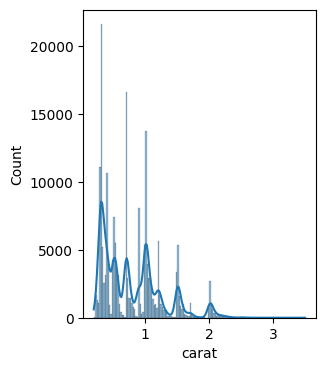

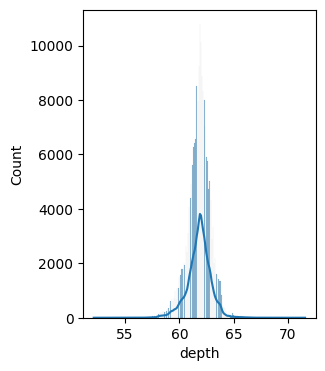

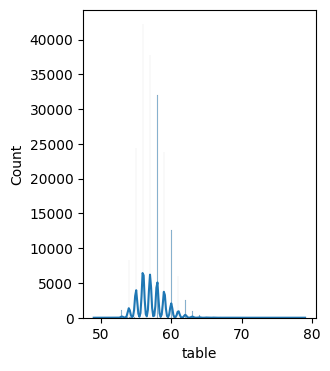

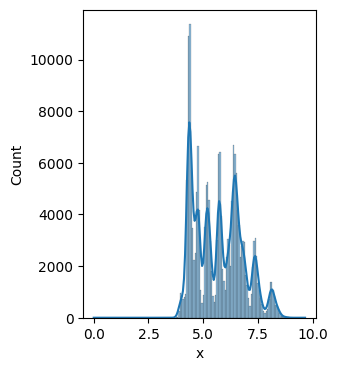

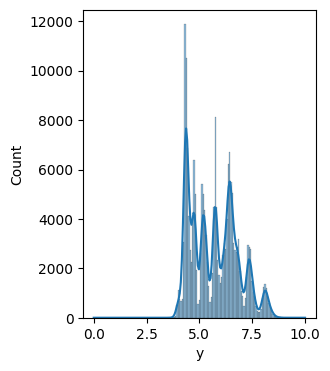

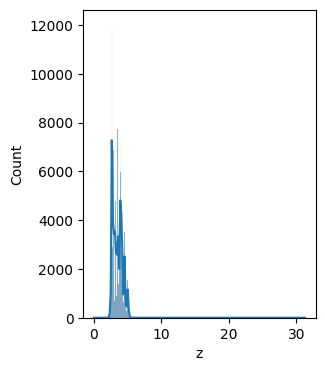

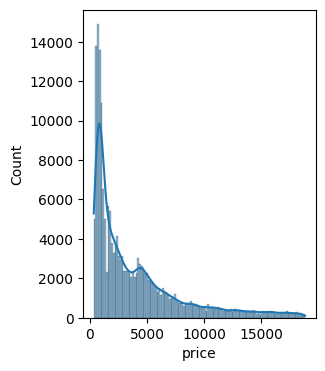

In [15]:
x=0
for i in numerical_columns:
    plt.figure(figsize=(3,4))
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

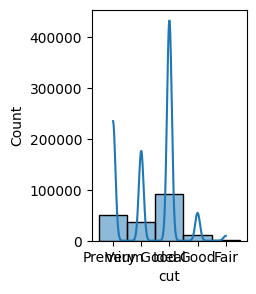

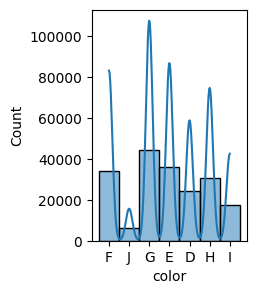

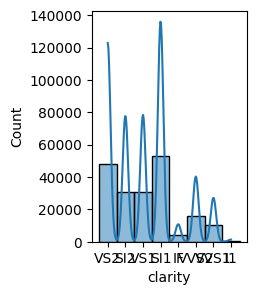

In [16]:
x=0
for i in categorical_columns:
    plt.figure(figsize=(2,3))
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [17]:
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}

In [18]:
clarity_map={'VS2':4, 'SI2':2, 'VS1':5, 'SI1':3, 'IF':8, 'VVS2':6, 'VVS1':7, 'I1'
:1}

In [19]:
color_map={'F':3, 'J':7, 'G':4, 'E':2, 'D':1, 'H':5, 'I':6}

In [20]:
df['cut']=df['cut'].map(cut_map)
df['color']=df['color'].map(color_map)
df['clarity']=df['clarity'].map(clarity_map)

In [21]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  int64  
 2   color    193573 non-null  int64  
 3   clarity  193573 non-null  int64  
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 14.8 MB
